**Question 01**

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [3]:
# loading CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train.shape, y_train.shape, x_test.shape, y_test.shape

170498071/170498071 [==============================] - 4s 0us/step


((50000, 32, 32, 3), (50000, 1), (10000, 32, 32, 3), (10000, 1))

In [4]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
class_names

['airplane',
 'automobile',
 'bird',
 'cat',
 'deer',
 'dog',
 'frog',
 'horse',
 'ship',
 'truck']

In [5]:
#function to display random sample of images
def display_random_images(x_data, y_data, class_names, num_samples=10):
    fig, axes = plt.subplots(nrows=10, ncols=num_samples, figsize=(15, 15))
    for i, class_name in enumerate(class_names):
        class_indices = np.where(y_data == i)[0]
        random_indices = np.random.choice(class_indices, num_samples, replace=False)
        for j, idx in enumerate(random_indices):
            axes[i, j].imshow(x_data[idx])
            axes[i, j].set_title(class_name)
            axes[i, j].axis('off')
    plt.tight_layout()
    plt.show()

In [6]:
#data preprocessing
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

In [7]:
#splitting dataset into training, validation, and testing sets
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=42)
x_train.shape, x_val.shape, y_train.shape, y_val.shape

((40000, 32, 32, 3), (10000, 32, 32, 3), (40000, 10), (10000, 10))

In [8]:
#designing CNN
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    Flatten(),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

# Compile model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [10]:
#hyperparameter tuning
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

#training model
history = model.fit(x_train, y_train, epochs=10, batch_size=64, validation_data=(x_val, y_val), callbacks=[early_stopping])

Epoch 1/10
625/625 [==============================] - 29s 47ms/step - loss: 1.6007 - accuracy: 0.4115 - val_loss: 1.3845 - val_accuracy: 0.5061
Epoch 2/10
625/625 [==============================] - 28s 46ms/step - loss: 1.4305 - accuracy: 0.4831 - val_loss: 1.2628 - val_accuracy: 0.5509
Epoch 3/10
625/625 [==============================] - 28s 45ms/step - loss: 1.3201 - accuracy: 0.5319 - val_loss: 1.1525 - val_accuracy: 0.5974
Epoch 4/10
625/625 [==============================] - 29s 46ms/step - loss: 1.2348 - accuracy: 0.5637 - val_loss: 1.0923 - val_accuracy: 0.6080
Epoch 5/10
625/625 [==============================] - 29s 46ms/step - loss: 1.1702 - accuracy: 0.5906 - val_loss: 1.0502 - val_accuracy: 0.6241
Epoch 6/10
625/625 [==============================] - 28s 45ms/step - loss: 1.1064 - accuracy: 0.6163 - val_loss: 0.9910 - val_accuracy: 0.6454
Epoch 7/10
625/625 [==============================] - 28s 45ms/step - loss: 1.0678 - accuracy: 0.6256 - val_loss: 0.9763 - val_accuracy:

In [11]:
#evaluating performance on validation dataset
val_loss, val_accuracy = model.evaluate(x_val, y_val)
print(f'Validation Loss: {val_loss}, Validation Accuracy: {val_accuracy}')

313/313 [==============================] - 2s 7ms/step - loss: 0.9067 - accuracy: 0.6840
Validation Loss: 0.9066862463951111, Validation Accuracy: 0.6840000152587891


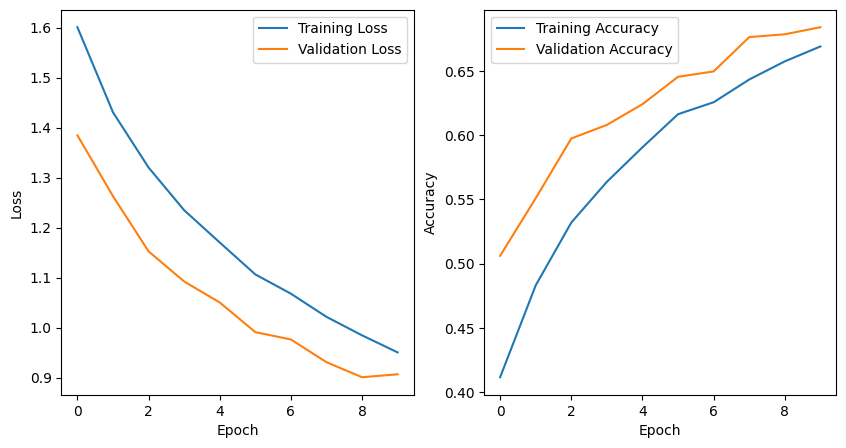

In [12]:
#plotting training and validation loss and accuracy
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [13]:
#credict classes for test set
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test, axis=1)

313/313 [==============================] - 2s 7ms/step


In [14]:
#classification report
print(classification_report(y_true_classes, y_pred_classes, target_names=class_names))

              precision    recall  f1-score   support

    airplane       0.80      0.66      0.72      1000
  automobile       0.76      0.90      0.82      1000
        bird       0.60      0.52      0.56      1000
         cat       0.47      0.45      0.46      1000
        deer       0.63      0.63      0.63      1000
         dog       0.52      0.65      0.58      1000
        frog       0.73      0.79      0.76      1000
       horse       0.78      0.68      0.73      1000
        ship       0.77      0.84      0.81      1000
       truck       0.85      0.74      0.79      1000

    accuracy                           0.69     10000
   macro avg       0.69      0.69      0.69     10000
weighted avg       0.69      0.69      0.69     10000



In [15]:
#confusion matrix
conf_matrix = confusion_matrix(y_true_classes, y_pred_classes)
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[660  40  66  19  16  15  11  11 119  43]
 [  7 898   1   9   7   5  11   3  23  36]
 [ 51   7 517  94  92 124  71  21  16   7]
 [ 12  11  57 448  68 266  81  25  18  14]
 [ 12   5  75  72 633  46  72  67  15   3]
 [ 10   2  49 169  48 653  24  39   3   3]
 [  8   7  47  73  36  17 792   8   7   5]
 [ 14   6  29  39  93 117   8 681   2  11]
 [ 38  60  14  19   3   6   6   2 839  13]
 [ 11 142   6  13   7   8  16  15  41 741]]


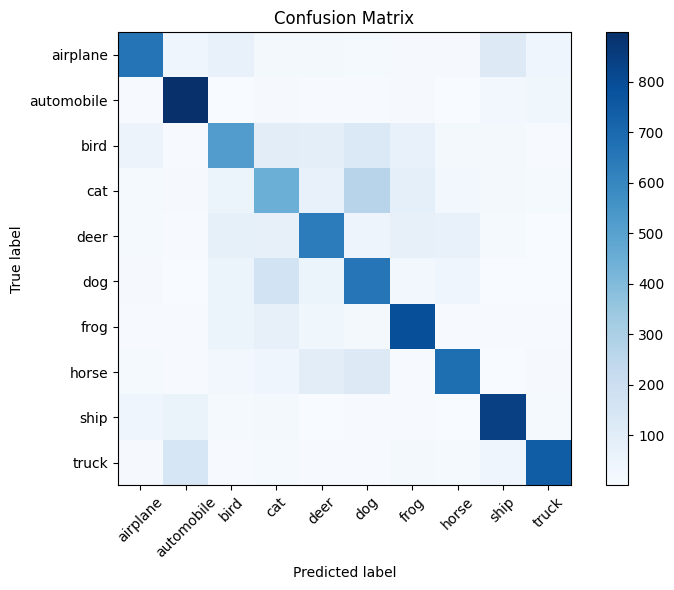

In [16]:
#ROC Curve and AUC are not applicable for multi-class classification
#In binary classification ROC curve and AUC are used to evaluate performance.

#confusion matrix
plt.figure(figsize=(8, 6))
plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names, rotation=45)
plt.yticks(tick_marks, class_names)
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.tight_layout()
plt.show()

**Question 02**

In [31]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

class RowLSTMPixelCNN(nn.Module):
    def __init__(self, input_channels=3, num_filters=64, kernel_size=7, num_blocks=3):
        super(RowLSTMPixelCNN, self).__init__()
        self.num_filters = num_filters
        self.kernel_size = kernel_size
        self.input_channels = input_channels
        self.conv_initial = nn.Conv2d(input_channels, num_filters, kernel_size, padding=kernel_size//2, padding_mode='zeros')

        self.blocks = nn.ModuleList()
        for _ in range(num_blocks):
            self.blocks.append(nn.Sequential(
                nn.Conv2d(num_filters, num_filters, kernel_size=1),
                nn.BatchNorm2d(num_filters),
                nn.ReLU(),
            ))

        self.lstm = nn.LSTM(input_size=num_filters, hidden_size=num_filters, num_layers=1, batch_first=True)
        self.conv_final = nn.Conv2d(num_filters, input_channels, kernel_size=1)

    def forward(self, x):
        x = F.relu(self.conv_initial(x))
        batch_size, channels, height, width = x.size()
        x = x.permute(0, 2, 3, 1).contiguous()  # Reshape to (batch_size, height, width, channels) for row processing
        x = x.view(batch_size * height, width, channels)  # Flatten height and width for LSTM

        for block in self.blocks:
            x = x.view(batch_size, height, width, channels)  # Reshape back to 4D for convolutions
            x = x.permute(0, 3, 1, 2).contiguous()  # Back to (batch_size, channels, height, width)
            x = block(x)
            x = x.permute(0, 2, 3, 1).contiguous()  # Prepare for LSTM
            x = x.view(batch_size * height, width, channels)  # Flatten for LSTM

        x, _ = self.lstm(x)  # LSTM expects (batch, seq, feature)
        x = x.view(batch_size, height, width, channels).permute(0, 3, 1, 2).contiguous()  # Reshape back to (batch_size, channels, height, width)
        x = self.conv_final(x)
        return x

# Training parameters, dataset, dataloader, model initialization, and training loop follow from here, unchanged from your provided code.


# Training parameters
batch_size = 64
epochs = 5
lr = 0.0001

# CIFAR-10 datasets and dataloaders
transform = transforms.Compose([transforms.ToTensor()])
train_dataset = datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

test_dataset = datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)


# Initialize the model and optimizer
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = RowLSTMPixelCNN().to(device)
optimizer = optim.Adam(model.parameters(), lr=lr)

# Training loop
for epoch in range(epochs):
    model.train()
    for batch_idx, (data, _) in enumerate(train_loader):
        data = data.to(device)
        optimizer.zero_grad()
        output = model(data)
        loss = F.mse_loss(output, data)
        loss.backward()
        optimizer.step()

        if batch_idx % 100 == 0:
            print(f'Epoch: {epoch+1}, Batch: {batch_idx}, Loss: {loss.item()}')

print("Training Complete")


Files already downloaded and verified
Files already downloaded and verified
Epoch: 1, Batch: 0, Loss: 0.30944475531578064
Epoch: 1, Batch: 100, Loss: 0.012982785701751709
Epoch: 1, Batch: 200, Loss: 0.006632328033447266
Epoch: 1, Batch: 300, Loss: 0.005868629552423954
Epoch: 1, Batch: 400, Loss: 0.003929890692234039
Epoch: 1, Batch: 500, Loss: 0.003406760049983859
Epoch: 1, Batch: 600, Loss: 0.0026559336110949516
Epoch: 1, Batch: 700, Loss: 0.002968952991068363
Epoch: 2, Batch: 0, Loss: 0.002156006870791316
Epoch: 2, Batch: 100, Loss: 0.0017436979105696082
Epoch: 2, Batch: 200, Loss: 0.002183454344049096
Epoch: 2, Batch: 300, Loss: 0.0018212809227406979
Epoch: 2, Batch: 400, Loss: 0.0014992784708738327
Epoch: 2, Batch: 500, Loss: 0.001264656544663012
Epoch: 2, Batch: 600, Loss: 0.0015431009232997894
Epoch: 2, Batch: 700, Loss: 0.0011221610475331545
Epoch: 3, Batch: 0, Loss: 0.001899569178931415
Epoch: 3, Batch: 100, Loss: 0.0009737646905705333
Epoch: 3, Batch: 200, Loss: 0.001276133465

In [22]:

 def generate_images(model, seed_image, num_rows, num_cols):
    generated_image = seed_image.copy()
    generated_image_tensor = torch.tensor(seed_image, dtype=torch.float32).permute(2, 0, 1).unsqueeze(0).to(device)
    with torch.no_grad():
        for i in range(num_rows):
            for j in range(num_cols):
                output = model(generated_image_tensor)
                next_pixel = output[0, :, i, j].cpu().numpy()
                generated_image[i, j] = next_pixel
                generated_image_tensor = torch.tensor(generated_image, dtype=torch.float32).permute(2, 0, 1).unsqueeze(0).to(device)
    return generated_image
# Generate sample images
import numpy as np
input_shape = (32, 32, 3)
seed_image = np.zeros(input_shape)
generated_image = generate_images(model, seed_image, num_rows=32, num_cols=32)

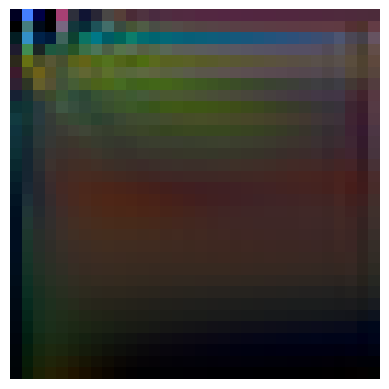

In [23]:
import matplotlib.pyplot as plt

def show_image(image):
    plt.imshow(image)
    plt.axis('off')
    plt.show()

# Generate sample images
import numpy as np
input_shape = (32, 32, 3)
seed_image = np.zeros(input_shape)
generated_image = generate_images(model, seed_image, num_rows=32, num_cols=32)

# Show generated image
show_image(generated_image)


In [20]:
# Evaluate log-likelihood
def compute_log_likelihood(model, data_loader):
    model.eval()
    log_likelihoods = []
    with torch.no_grad():
        for data, _ in data_loader:
            data = data.to(device)
            output = model(data)
            # Compute log probabilities using a suitable probability distribution function
            # Compute the log-likelihood for each image and append to log_likelihoods
    return torch.mean(torch.tensor(log_likelihoods))

log_likelihood = compute_log_likelihood(model, test_loader)
print(f'Log-Likelihood: {log_likelihood}')

# Evaluate FID
# You need to implement or use existing FID computation methods


Log-Likelihood: nan


**Question 03**

In [2]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import pytorch_lightning as pl

# pixelCNN Class
class PixelCNN(pl.LightningModule):
    def __init__(self, input_channels=3, num_filters=64, kernel_size=7, num_blocks=3, variant='A'):
        super(PixelCNN, self).__init__()
        self.num_filters = num_filters
        self.kernel_size = kernel_size
        self.input_channels = input_channels
        self.conv_initial = nn.Conv2d(input_channels, num_filters, kernel_size, padding=kernel_size//2, padding_mode='zeros')
        self.blocks = nn.ModuleList()
        if variant == 'C':
            self.blocks.append(nn.Conv2d(num_filters, num_filters, kernel_size=1))
            self.blocks.append(nn.BatchNorm2d(num_filters))
            self.blocks.append(nn.ReLU())
            self.blocks.append(nn.Conv2d(num_filters, num_filters, kernel_size=3, padding=1))
            self.blocks.append(nn.BatchNorm2d(num_filters))
            self.blocks.append(nn.ReLU())
            num_blocks -= 1
        for _ in range(num_blocks):
            self.blocks.append(nn.Sequential(
                nn.Conv2d(num_filters, num_filters, kernel_size=1),
                nn.BatchNorm2d(num_filters),
                nn.ReLU(),
            ))
        self.conv_final = nn.Conv2d(num_filters, input_channels, kernel_size=1)

    def forward(self, x):
        x = F.relu(self.conv_initial(x))
        for block in self.blocks:
            x = block(x)
        x = self.conv_final(x)
        return x

    def training_step(self, batch, batch_idx):
        data, _ = batch
        output = self(data)
        loss = F.mse_loss(output, data)
        self.log('train_loss', loss)
        return loss

    def configure_optimizers(self):
        return optim.Adam(self.parameters(), lr=0.001)

#data loading and initialization
transform = transforms.Compose([transforms.ToTensor()])
train_dataset = datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
train_loader = DataLoader(train_dataset, batch_size=128, shuffle=True)
test_dataset = datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)
test_loader = DataLoader(test_dataset, batch_size=128, shuffle=False)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

#adjust trainer initialization for GPU configuration
def get_trainer():
    if torch.cuda.is_available():
        return pl.Trainer(max_epochs=10, devices=1, accelerator="gpu")
    else:
        return pl.Trainer(max_epochs=10)


#train PixelCNN Variants
variants = ['A', 'B', 'C']
for variant in variants:
    pixelcnn_variant = PixelCNN(variant=variant).to(device)
    trainer = get_trainer()
    trainer.fit(pixelcnn_variant, train_loader)


Files already downloaded and verified
Files already downloaded and verified


INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.callbacks.model_summary:
  | Name         | Type       | Params
--------------------------------------------
0 | conv_initial | Conv2d     | 9.5 K 
1 | blocks       | ModuleList | 12.9 K
2 | conv_final   | Conv2d     | 195   
--------------------------------------------
22.5 K    Trainable params
0         Non-trainable params
22.5 K    Total params
0.090     Total estimated model params size (MB)


Training: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=10` reached.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.callbacks.model_summary:
  | Name         | Type       | Params
--------------------------------------------
0 | conv_initial | Conv2d     | 9.5 K 
1 | blocks       | ModuleList | 12.9 K
2 | conv_final   | Conv2d     | 195   
--------------------------------------------
22.5 K    Trainable params
0         Non-trainable params
22.5 K    Total params
0.090     Total estimated model params size (MB)


Training: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=10` reached.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.callbacks.model_summary:
  | Name         | Type       | Params
--------------------------------------------
0 | conv_initial | Conv2d     | 9.5 K 
1 | blocks       | ModuleList | 49.9 K
2 | conv_final   | Conv2d     | 195   
--------------------------------------------
59.6 K    Trainable params
0         Non-trainable params
59.6 K    Total params
0.238     Total estimated model params size (MB)


Training: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=10` reached.


In [ ]:
#evaluation functions
def loglikelihood_score(model, test_loader, device):
    model = model.to(device)
    model.eval()
    loglikelihoods = []
    with torch.no_grad():
        for data, _ in test_loader:
            data = data.to(device)
            output = model(data)
            log_likelihood = F.mse_loss(output, data, reduction='none').sum(dim=(1, 2, 3))
            loglikelihoods.extend(log_likelihood.cpu().numpy())
    return np.mean(loglikelihoods)

def calculate_fid(real_features, generated_features):
    mu1, sigma1 = real_features.mean(axis=0), np.cov(real_features, rowvar=False)
    mu2, sigma2 = generated_features.mean(axis=0), np.cov(generated_features, rowvar=False)
    ssdiff = np.sum((mu1 - mu2) ** 2.0)
    covmean = linalg.sqrtm(sigma1.dot(sigma2), disp=False)[0]
    if np.iscomplexobj(covmean):
        covmean = covmean.real
    fid = ssdiff + np.trace(sigma1 + sigma2 - 2.0 * covmean)
    return fid

def calculate_features(model, test_loader, device):
    model.eval()
    features = []
    with torch.no_grad():
        for data, _ in test_loader:
            data = data.to(device)
            output = model(data)
            features.append(output.view(output.size(0), -1).cpu().numpy())
    return np.concatenate(features, axis=0)

# Train PixelCNN Variants
variants = ['A', 'B', 'C']
trained_models = {}
for variant in variants:
    pixelcnn_variant = PixelCNN(variant=variant).to(device)
    trainer = pl.Trainer(max_epochs=10, accelerator="ddp" if torch.cuda.is_available() else None)
    trainer.fit(pixelcnn_variant, train_loader)
    trained_models[variant] = pixelcnn_variant

# Evaluate PixelCNN Variants
for variant, model in trained_models.items():
    log_likelihood = loglikelihood_score(model, test_loader, device)
    print(f"Log-Likelihood ({variant}):", log_likelihood)

# Calculate FID for PixelCNN Variants
fid_scores = {}
for i, variant_a in enumerate(variants):
    for variant_b in variants[i+1:]:
        real_features = calculate_features(trained_models[variant_a], test_loader, device)
        generated_features = calculate_features(trained_models[variant_b], test_loader, device)
        fid_score = calculate_fid(real_features, generated_features)
        fid_scores[(variant_a, variant_b)] = fid_score
        print(f"Frechet Inception Distance ( {variant_a} vs Variant {variant_b}):", fid_score)